<a href="https://colab.research.google.com/github/destrianra/struktur_data/blob/main/Prak8_UAS_G_231_222_0007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 5
3 	 13
4 	 8
5 	 14


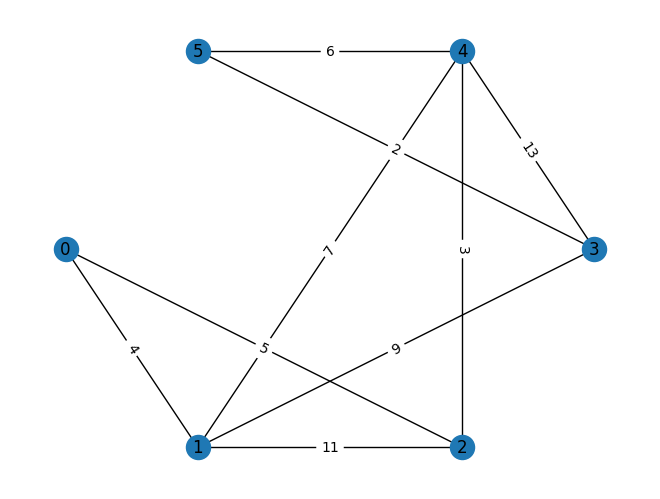

In [ ]:
# Install required libraries
!pip install networkx matplotlib

import networkx as nx
import matplotlib.pyplot as plt

intmax = 9999999999


class Graph():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def minDistance(self, dist, sptSet):
        min_val = intmax
        min_index = -1

        for u in range(self.V):
            if dist[u] < min_val and not sptSet[u]:
                min_val = dist[u]
                min_index = u

        return min_index

    def dijkstra(self, src):
        dist = [intmax] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for _ in range(self.V):
            x = self.minDistance(dist, sptSet)
            sptSet[x] = True

            for y in range(self.V):
                if (
                    self.graph[x][y] > 0
                    and not sptSet[y]
                    and dist[y] > dist[x] + self.graph[x][y]
                ):
                    dist[y] = dist[x] + self.graph[x][y]

        self.printSolution(dist)

        # Create a graph for visualization
        G = nx.Graph()
        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] > 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        # Positioning nodes using shell layout
        pos = nx.shell_layout(G)

        # Draw the graph
        nx.draw(G, pos, with_labels=True)
        edge_labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()


# Driver program
g = Graph(6)
g.graph = [
    [0, 4, 5, 0, 0, 0],
    [4, 0, 11, 9, 7, 0],
    [5, 11, 0, 0, 3, 0],
    [0, 9, 0, 0, 13, 2],
    [0, 7, 3, 13, 0, 6],
    [0, 0, 0, 2, 6, 0],
]

g.dijkstra(0)
